In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [84]:
cars = pd.read_csv("Data_Car_Price.csv")

In [85]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-bae,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [86]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-bae            float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Valeurs manquantes et Transtypage

In [87]:
cars = cars.replace('?', np.NaN)

In [88]:
cars = cars.drop([0, 1, 2])

In [89]:
cars['normalized-losses'] = cars['normalized-losses'].fillna(-1)
cars['normalized-losses'] = cars['normalized-losses'].astype(int)
cars['normalized-losses'] = cars['normalized-losses'].replace(-1, np.nan)

In [90]:
cars['normalized-losses'] = cars.groupby(['make'])['normalized-losses'].transform(lambda x: x.fillna(x.mean()))

In [91]:
cars = cars.dropna(subset = ['normalized-losses'])
cars.sort_values('normalized-losses')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-bae,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
176,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
175,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
174,-1,65.0,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
173,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
177,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248
123,-1,74.0,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
195,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
197,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
199,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
152,1,74.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488


In [92]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-bae            float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [93]:
cars.loc[:, cars.isnull().any()]

,num-of-doors,bore,stroke,price
3,four,3.19,3.40,13950
4,four,3.19,3.40,17450
5,two,3.19,3.40,15250
6,four,3.19,3.40,17710
7,four,3.19,3.40,18920
8,four,3.13,3.40,23875
9,two,3.13,3.40,NaN
10,two,3.50,2.80,16430
11,four,3.50,2.80,16925
12,two,3.31,3.19,20970


In [94]:
cars = cars.dropna(subset = ['price'])

In [95]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-bae            float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [96]:
cars['normalized-losses'] = cars['normalized-losses'].astype(int)
cars['stroke'] = cars['stroke'].astype(float)
cars['bore'] = cars['bore'].astype(float)
cars['peak-rpm'] = cars['peak-rpm'].astype(float)
cars['price'] = cars['price'].astype(float)
cars['horsepower'] = cars['horsepower'].astype(int)

In [97]:
cars.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-bae            float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [98]:
cars['bore'] = cars.groupby(['compression-ratio'])['bore'].transform(lambda x: x.fillna(x.mean()))
cars['stroke'] = cars.groupby(['compression-ratio'])['stroke'].transform(lambda x: x.fillna(x.mean()))
cars['horsepower'] = cars.groupby(['aspiration', 'num-of-cylinders'])['horsepower'].transform(lambda x: x.fillna(x.mean()))
cars['peak-rpm'] = cars.groupby(['aspiration', 'num-of-cylinders'])['peak-rpm'].transform(lambda x: x.fillna(x.mean()))

In [99]:
cars.iloc[133:140, 21:24]

,horsepower,peak-rpm,city-mpg
145,111,4800.0,24
146,82,4800.0,28
147,94,5200.0,25
148,82,4800.0,23
149,111,4800.0,23
150,62,4800.0,35
151,62,4800.0,31


In [100]:
cars['num-of-doors'] = cars['num-of-doors'].replace(np.nan, 'four')

In [101]:
cars['num-of-doors']

3      four
4      four
5       two
6      four
7      four
8      four
10      two
11     four
12      two
13     four
14     four
15     four
16      two
17     four
18      two
19      two
20     four
21      two
22      two
23      two
24     four
25     four
26     four
27     four
28     four
29      two
30      two
31      two
32      two
33      two
       ... 
175    four
176    four
177    four
178     two
179     two
180    four
181    four
182     two
183     two
184    four
185    four
186    four
187    four
188    four
189     two
190     two
191    four
192    four
193    four
194    four
195    four
196    four
197    four
198    four
199    four
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 193, dtype: object

In [102]:
cars.isna().any()[lambda x: x]

Series([], dtype: bool)

In [103]:
cars.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-bae            float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Conversion

In [104]:
cars['city-mpg'] = cars['city-mpg'].apply(lambda x: 235/x)
cars['highway-mpg'] = cars['highway-mpg'].apply(lambda x: 235/x)

In [105]:
cars['city-mpg']

3       9.791667
4      13.055556
5      12.368421
6      12.368421
7      12.368421
8      13.823529
10     10.217391
11     10.217391
12     11.190476
13     11.190476
14     11.750000
15     14.687500
16     14.687500
17     15.666667
18      5.000000
19      6.184211
20      6.184211
21      6.351351
22      7.580645
23      9.791667
24      7.580645
25      7.580645
26      7.580645
27      9.791667
28      9.791667
29     12.368421
30      4.795918
31      7.580645
32      6.184211
33      7.833333
         ...    
175     8.703704
176     8.703704
177     8.703704
178    11.750000
179    12.368421
180    11.750000
181    12.368421
182     6.351351
183     8.703704
184     6.351351
185     8.703704
186     8.703704
187     6.351351
188     9.038462
189     9.791667
190     9.791667
191    12.368421
192     7.121212
193     9.400000
194    10.217391
195    10.217391
196     9.791667
197     9.791667
198    13.823529
199    13.823529
200    10.217391
201    12.368421
202    13.0555

In [106]:
cars['highway-mpg']

3       7.833333
4      10.681818
5       9.400000
6       9.400000
7       9.400000
8      11.750000
10      8.103448
11      8.103448
12      8.392857
13      8.392857
14      9.400000
15     10.681818
16     10.681818
17     11.750000
18      4.433962
19      5.465116
20      5.465116
21      5.731707
22      6.184211
23      7.833333
24      6.184211
25      6.184211
26      6.184211
27      7.833333
28      7.833333
29      9.791667
30      4.351852
31      6.184211
32      5.595238
33      6.911765
         ...    
175     7.343750
176     7.343750
177     7.343750
178     9.791667
179     9.791667
180     9.791667
181     9.791667
182     5.108696
183     6.911765
184     5.108696
185     6.911765
186     6.911765
187     5.595238
188     7.343750
189     8.103448
190     8.103448
191     9.791667
192     6.184211
193     7.580645
194     8.392857
195     8.392857
196     8.392857
197     8.392857
198    10.681818
199    10.681818
200     8.392857
201     9.400000
202    10.2173

# Normalisation ou standardisation

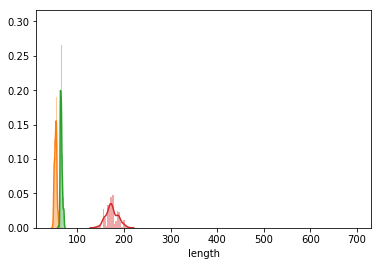

In [107]:
cars_length = cars['length']
cars_width = cars['width']
cars_height = cars['height']
sns.distplot(cars_height, bins = 20)
sns.distplot(cars_width, bins = 20)
sns.distplot(cars_length, bins = 20)
plt.show()

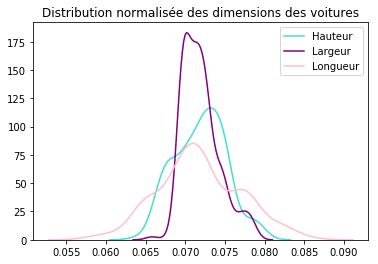

In [108]:
plt.title("Distribution normalisée des dimensions des voitures", color='black')

height_arr = np.array(cars['height'])
cars_height_norm = preprocessing.normalize([height_arr])
sns.distplot(cars_height_norm, bins = 20, hist = False, color = 'turquoise', label="Hauteur")

width_arr = np.array(cars['width'])
cars_width_norm = preprocessing.normalize([width_arr])
sns.distplot(cars_width_norm, bins = 20, hist = False, color = 'purple', label="Largeur")

length_arr = np.array(cars['length'])
cars_length_norm = preprocessing.normalize([length_arr])
sns.distplot(cars_length_norm, bins = 20, hist = False, color = 'pink', label="Longueur")

plt.show()

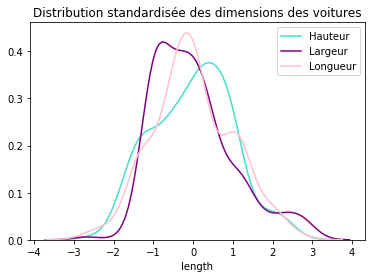

In [109]:
plt.title("Distribution standardisée des dimensions des voitures", color='black')

length_arr = np.array(cars['height'])
cars_length_sigma = np.std(length_arr)
cars_length_mean = np.mean(length_arr)
cars_length_standardized = cars['height'].apply(lambda x: (x-cars_length_mean)/cars_length_sigma)
sns.distplot(cars_length_standardized,hist = False, label="Hauteur",  color = 'turquoise')

length_arr = np.array(cars['width'])
cars_length_sigma = np.std(length_arr)
cars_length_mean = np.mean(length_arr)
cars_length_standardized = cars['width'].apply(lambda x: (x-cars_length_mean)/cars_length_sigma)
sns.distplot(cars_length_standardized,hist = False, label="Largeur", color = 'purple')

length_arr = np.array(cars['length'])
cars_length_sigma = np.std(length_arr)
cars_length_mean = np.mean(length_arr)
cars_length_standardized = cars['length'].apply(lambda x: (x-cars_length_mean)/cars_length_sigma)
sns.distplot(cars_length_standardized,hist = False, label="Longueur", color = 'pink')

plt.show()

# Découpage et regroupement

In [110]:
hp = cars['horsepower']
hp = pd.cut(hp,3,labels = ['faible','moyenne','forte'])
hp

3       faible
4       faible
5       faible
6       faible
7       faible
8      moyenne
10      faible
11      faible
12     moyenne
13     moyenne
14     moyenne
15     moyenne
16     moyenne
17     moyenne
18      faible
19      faible
20      faible
21      faible
22      faible
23      faible
24      faible
25      faible
26      faible
27      faible
28      faible
29     moyenne
30      faible
31      faible
32      faible
33      faible
        ...   
175     faible
176     faible
177     faible
178    moyenne
179    moyenne
180    moyenne
181    moyenne
182     faible
183     faible
184     faible
185     faible
186     faible
187     faible
188     faible
189     faible
190     faible
191     faible
192     faible
193     faible
194     faible
195     faible
196     faible
197     faible
198    moyenne
199    moyenne
200     faible
201    moyenne
202    moyenne
203     faible
204     faible
Name: horsepower, Length: 193, dtype: category
Categories (3, object): [faible < moye

In [111]:
cars['hp'] = hp
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-bae,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,hp
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102,5500.0,9.791667,7.833333,13950.0,faible
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115,5500.0,13.055556,10.681818,17450.0,faible
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110,5500.0,12.368421,9.400000,15250.0,faible
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500.0,12.368421,9.400000,17710.0,faible
7,1,161,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500.0,12.368421,9.400000,18920.0,faible
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140,5500.0,13.823529,11.750000,23875.0,moyenne
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101,5800.0,10.217391,8.103448,16430.0,faible
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101,5800.0,10.217391,8.103448,16925.0,faible
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.00,121,4250.0,11.190476,8.392857,20970.0,moyenne
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.00,121,4250.0,11.190476,8.392857,21105.0,moyenne


In [112]:
cars = cars[['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-bae', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'horsepower', 'hp']]
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-bae,...,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower,hp
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,5500.0,9.791667,7.833333,13950.0,102,faible
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,5500.0,13.055556,10.681818,17450.0,115,faible
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,5500.0,12.368421,9.400000,15250.0,110,faible
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,5500.0,12.368421,9.400000,17710.0,110,faible
7,1,161,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,5500.0,12.368421,9.400000,18920.0,110,faible
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,5500.0,13.823529,11.750000,23875.0,140,moyenne
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,5800.0,10.217391,8.103448,16430.0,101,faible
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,5800.0,10.217391,8.103448,16925.0,101,faible
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.00,4250.0,11.190476,8.392857,20970.0,121,moyenne
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.00,4250.0,11.190476,8.392857,21105.0,121,moyenne


# DUMMIES

In [113]:
cars['fuel-type'] = pd.get_dummies(cars['fuel-type'])
cars['aspiration'] = pd.get_dummies(cars['aspiration'])

cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-bae,...,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower,hp
3,2,164,audi,0,1,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,5500.0,9.791667,7.833333,13950.0,102,faible
4,2,164,audi,0,1,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,5500.0,13.055556,10.681818,17450.0,115,faible
5,2,161,audi,0,1,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,5500.0,12.368421,9.400000,15250.0,110,faible
6,1,158,audi,0,1,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,5500.0,12.368421,9.400000,17710.0,110,faible
7,1,161,audi,0,1,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,5500.0,12.368421,9.400000,18920.0,110,faible
8,1,158,audi,0,0,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,5500.0,13.823529,11.750000,23875.0,140,moyenne
10,2,192,bmw,0,1,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,5800.0,10.217391,8.103448,16430.0,101,faible
11,0,192,bmw,0,1,four,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,5800.0,10.217391,8.103448,16925.0,101,faible
12,0,188,bmw,0,1,two,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.00,4250.0,11.190476,8.392857,20970.0,121,moyenne
13,0,188,bmw,0,1,four,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.00,4250.0,11.190476,8.392857,21105.0,121,moyenne


# BOXPLOT

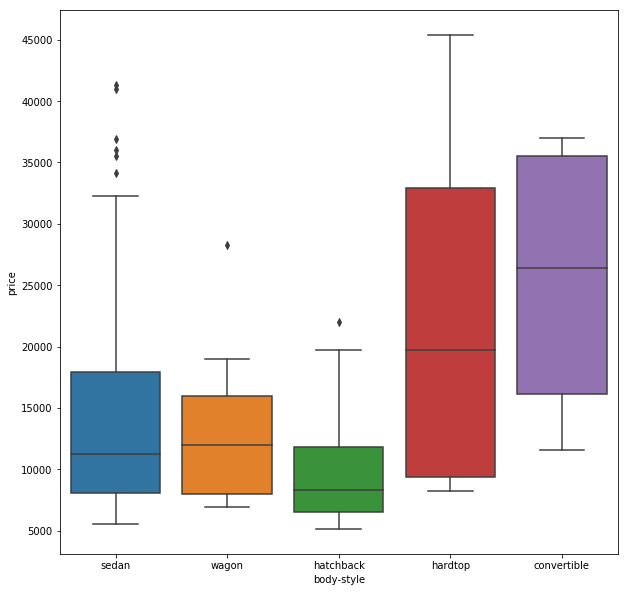

In [114]:
plt.figure(figsize=(10,10))
sns.boxplot(x="body-style", y="price", data=cars)
plt.show()

# REGPLOT

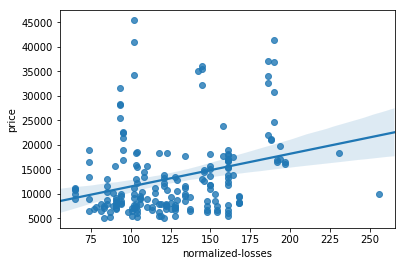

In [115]:
sns.regplot(x="normalized-losses", y="price", data=cars)
plt.show()

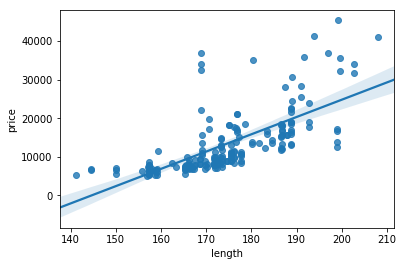

In [116]:
sns.regplot(x="length", y="price", data=cars)
plt.show()

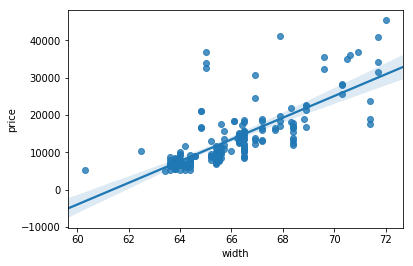

In [117]:
sns.regplot(x="width", y="price", data=cars)
plt.show()

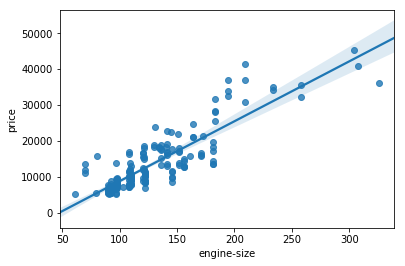

In [118]:
sns.regplot(x="engine-size", y="price", data=cars)
plt.show()

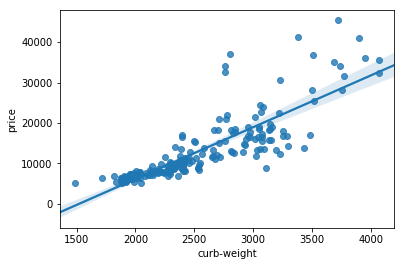

In [119]:
sns.regplot(x="curb-weight", y="price", data=cars)
plt.show()

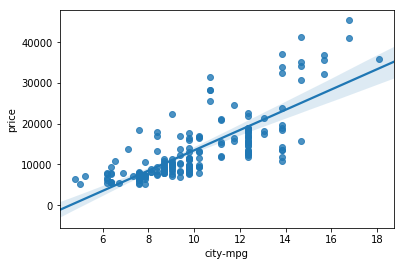

In [120]:
sns.regplot(x="city-mpg", y="price", data=cars)
plt.show()

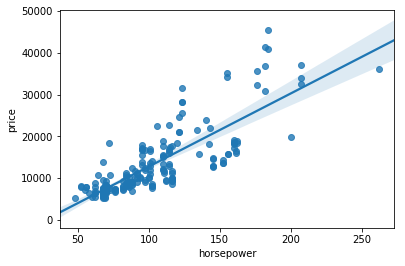

In [121]:
sns.regplot(x="horsepower", y="price", data=cars)
plt.show()

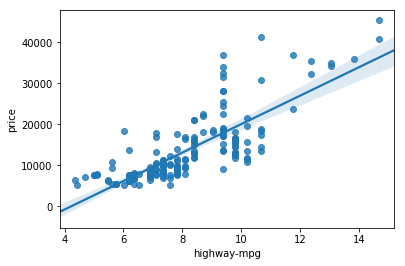

In [122]:
sns.regplot(x="highway-mpg", y="price", data=cars)
plt.show()

In [123]:
cars.corr()

,symboling,normalized-losses,fuel-type,aspiration,wheel-bae,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower
symboling,1.000000,0.481145,-0.194159,0.048126,-0.528035,-0.366174,-0.242886,-0.529614,-0.241653,-0.115830,-0.192371,0.020203,-0.180606,0.290269,0.057710,-0.037795,-0.090234,0.071982
normalized-losses,0.481145,1.000000,-0.092208,-0.001195,-0.014671,0.105381,0.143334,-0.345471,0.199999,0.221852,0.054826,0.050531,-0.113137,0.248628,0.353395,0.267289,0.295574,0.358403
fuel-type,-0.194159,-0.092208,1.000000,-0.413559,0.304453,0.211555,0.244624,0.280336,0.223808,0.072358,0.065024,0.252841,0.985324,-0.481047,-0.238086,-0.156025,0.109809,-0.167420
aspiration,0.048126,-0.001195,-0.413559,1.000000,-0.244028,-0.228835,-0.296109,-0.073998,-0.321071,-0.109557,-0.225785,-0.238452,-0.313593,0.194600,-0.155495,-0.206515,-0.175930,-0.239913
wheel-bae,-0.528035,-0.014671,0.304453,-0.244028,1.000000,0.887021,0.819075,0.576819,0.798528,0.585873,0.521038,0.149057,0.247601,-0.375931,0.498114,0.595965,0.597140,0.383866
length,-0.366174,0.105381,0.211555,-0.228835,0.887021,1.000000,0.863937,0.496987,0.884463,0.687399,0.623226,0.114396,0.160577,-0.289430,0.664258,0.713536,0.696710,0.588581
width,-0.242886,0.143334,0.244624,-0.296109,0.819075,0.863937,1.000000,0.298361,0.876827,0.738257,0.556899,0.178820,0.190044,-0.258730,0.688346,0.752283,0.760351,0.621274
height,-0.529614,-0.345471,0.280336,-0.073998,0.576819,0.496987,0.298361,1.000000,0.317999,0.079238,0.228705,-0.092447,0.259549,-0.327484,0.015549,0.093783,0.142028,-0.088819
curb-weight,-0.241653,0.199999,0.223808,-0.321071,0.798528,0.884463,0.876827,0.317999,1.000000,0.849780,0.661552,0.175993,0.159201,-0.280128,0.786475,0.837711,0.836184,0.761013
engine-size,-0.115830,0.221852,0.072358,-0.109557,0.585873,0.687399,0.738257,0.079238,0.849780,1.000000,0.612517,0.213218,0.030458,-0.257839,0.745676,0.784919,0.874178,0.828066


In [124]:
cars.describe()

,symboling,normalized-losses,fuel-type,aspiration,wheel-bae,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,horsepower
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.813472,125.880829,0.103627,0.818653,98.970466,174.225907,65.916580,53.843005,2553.108808,126.715026,3.323123,3.255770,10.222383,5122.279793,9.904857,8.028138,13236.331606,102.886010
std,1.252674,35.790206,0.305569,0.386308,6.068233,12.543103,2.109017,2.422306,526.542707,42.330134,0.269348,0.309734,4.076456,487.041434,2.571361,1.871198,8077.165581,37.538834
min,-2.000000,65.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,4.795918,4.351852,5118.000000,48.000000
25%,0.000000,95.000000,0.000000,1.000000,94.500000,166.300000,64.200000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,4800.000000,7.833333,6.527778,7775.000000,70.000000
50%,1.000000,121.000000,0.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2410.000000,110.000000,3.310000,3.290000,9.000000,5200.000000,9.400000,7.833333,10245.000000,95.000000
75%,2.000000,153.000000,0.000000,1.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,145.000000,3.590000,3.410000,9.400000,5500.000000,12.368421,9.400000,16515.000000,116.000000
max,3.000000,256.000000,1.000000,1.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,18.076923,14.687500,45400.000000,262.000000


# Régression linéaire

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
cars_final = cars[['engine-size','curb-weight','horsepower','city-mpg','width', 'length','highway-mpg','make', 'body-style','engine-type','num-of-cylinders']]

In [127]:
model = LinearRegression()

In [128]:
model.fit(cars_final[['engine-size', 'horsepower', 'highway-mpg', 'city-mpg', 'curb-weight', 'width', 'length']], cars['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
#a
model.coef_

array([  91.16159788,   17.61290282, -834.95101578, 1073.64271797,
          2.45119299,  745.44489635,  -50.47494247])

In [130]:
#b
model.intercept_

-50659.807477491006

In [131]:
model.score(cars_final[['engine-size', 'horsepower', 'highway-mpg', 'city-mpg', 'curb-weight', 'width', 'length']], cars['price'])

0.8271661528749111

In [132]:
# ŷ = ax + b
# Ŷ = 167 (['engine-size']) - 7900

In [133]:
model.predict(cars_final[['engine-size', 'horsepower', 'highway-mpg', 'city-mpg', 'curb-weight', 'width', 'length']])

array([11208.64008061, 16367.69614455, 15725.2449416 , 19575.75183584,
       19845.38306449, 19841.65124076, 10419.86034127, 10419.86034127,
       17452.39694475, 17587.21255907, 19007.51222175, 26696.70006269,
       27567.54418335, 30108.15384719, -1111.77034408,  4988.95527527,
        4928.36969668,  4993.91498711,  5935.91932019,  8878.66180785,
        6158.97788207,  6212.9041278 ,  6212.9041278 ,  9033.08696607,
       11540.73447585, 18790.01594929,  4798.27338234,  6835.00399723,
        4206.68930628,  6597.40286361,  6636.62195142,  6092.62214369,
        6370.38649343,  9910.80463844, 10040.71786679,  9678.73371612,
        7832.71361913, 10443.89153958, 11176.668652  , 34227.84949078,
       34227.84949078, 44174.21638575,  5374.06298089,  6293.23261188,
        6305.48857682,  6014.87923933,  6027.13520427, 10090.221725  ,
       10090.221725  , 10102.47768993, 12822.41528898, 11957.53430401,
       12018.8141287 , 11957.53430401, 12018.8141287 , 10511.78989499,
      

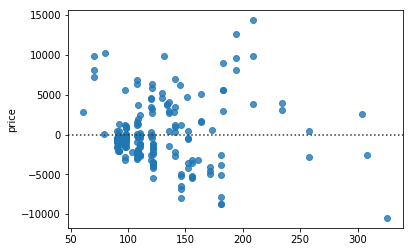

In [134]:
sns.residplot(cars_final[['engine-size']], cars['price'])
plt.show()

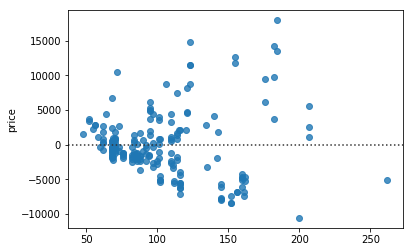

In [135]:
sns.residplot(cars_final[['horsepower']], cars['price'])
plt.show()

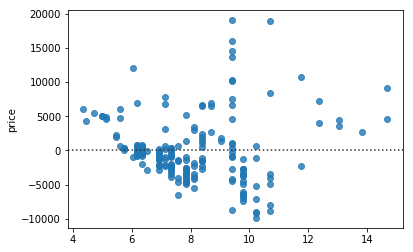

In [136]:
sns.residplot(cars_final[['highway-mpg']], cars['price'])
plt.show()

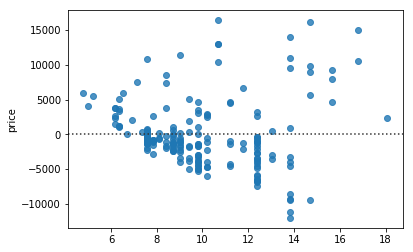

In [137]:
sns.residplot(cars_final[['city-mpg']], cars['price'])
plt.show()

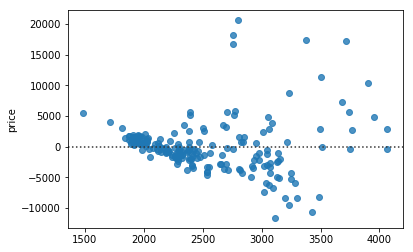

In [138]:
sns.residplot(cars_final[['curb-weight']], cars['price'])
plt.show()

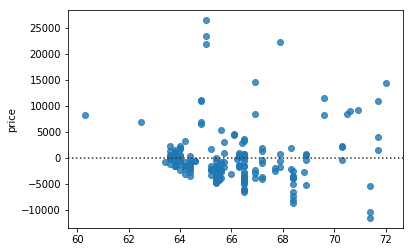

In [139]:
sns.residplot(cars_final[['width']], cars['price'])
plt.show()

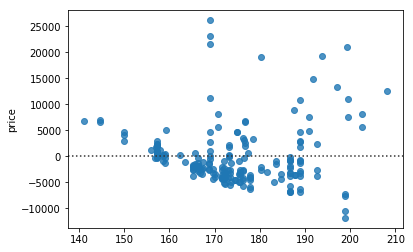

In [140]:
sns.residplot(cars_final[['length']], cars['price'])
plt.show()

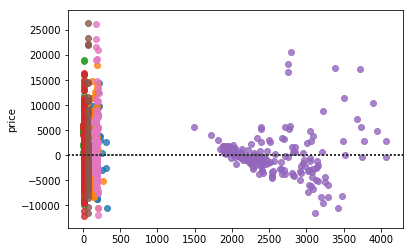

In [141]:
sns.residplot(cars_final[['engine-size']], cars['price'])

sns.residplot(cars_final[['horsepower']], cars['price'])

sns.residplot(cars_final[['highway-mpg']], cars['price'])

sns.residplot(cars_final[['city-mpg']], cars['price'])

sns.residplot(cars_final[['curb-weight']], cars['price'])

sns.residplot(cars_final[['width']], cars['price'])

sns.residplot(cars_final[['length']], cars['price'])
plt.show()

# Régression linéaire multivariée (ou multiple)

In [142]:
X = cars[['engine-size','curb-weight','horsepower','highway-mpg']]

In [143]:
test = LinearRegression()

In [144]:
test.fit(X, cars['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
#a
test.coef_

array([ 84.26061574,   3.545656  ,  39.03074039, 472.770562  ])

In [146]:
#b
model.intercept_

-50659.807477491006

In [147]:
test.predict(X)

array([10850.72565542, 16706.57615967, 14781.44360391, 15976.32967548,
       16366.35183534, 18695.00838097, 11060.78474039, 11060.78474039,
       17813.69966225, 18008.71074218, 19513.09847639, 26912.19705092,
       27444.04545073, 28392.25736907,    81.17160466,  5239.52822857,
        5363.62618853,  5294.59445464,  5508.52465118,  9182.8167785 ,
        5831.17934706,  5909.18377903,  5909.18377903,  9406.19310642,
       12101.72318232, 19095.77972633,  3842.51131063,  5787.1894139 ,
        3852.68254364,  6560.1799881 ,  6616.91048408,  6808.37590801,
        6858.01509199,  9615.71322331,  9803.63299125,  9856.81783123,
       10097.92243914, 11614.32588448, 10581.45239732, 34568.32738205,
       34568.32738205, 43931.32922746,  6302.61763807,  5677.88101089,
        5695.60929088,  5837.43553083,  5855.16381083,  8805.10653572,
        8805.10653572,  8822.83481572, 11400.23658643, 11182.29123329,
       11270.93263325, 11182.29123329, 11270.93263325,  9780.67951745,
      

In [173]:
sns.distplot(X, cars['price'], color=('green', 'gray', 'blue', 'red'))
plt.show()

ValueError: color kwarg must have one color per data set. 1 data sets and 4 colors were provided

# Evaluation et comparaison

In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
model.fit(cars_final[['engine-size']],cars['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
model.intercept_

-7900.383842196748

In [153]:
model.score(cars_final[['engine-size']], cars['price'])

0.764187768432692

In [154]:
model.predict(cars_final[['engine-size']])

array([10281.37453564, 14785.11284941, 14785.11284941, 14785.11284941,
       14785.11284941, 13951.08723575, 10114.5694129 , 10114.5694129 ,
       19455.65628592, 19455.65628592, 19455.65628592, 26961.88680888,
       26961.88680888, 26961.88680888,  2274.72864448,  7112.07720372,
        7112.07720372,  7112.07720372,  7112.07720372,  8446.51818558,
        7112.07720372,  7112.07720372,  7112.07720372,  8446.51818558,
       12449.84113116, 18121.21530406,  7445.68744919,  7445.68744919,
        5277.22085366,  7445.68744919,  7445.68744919,  7445.68744919,
        7445.68744919, 10448.17965837, 10448.17965837, 10448.17965837,
       10448.17965837, 10448.17965837, 10448.17965837, 35135.33782277,
       35135.33782277, 46478.08616857,  7278.88232645,  7278.88232645,
        7278.88232645,  7278.88232645,  7278.88232645,  3775.97474907,
        3775.97474907,  3775.97474907,  5444.0259764 , 12449.84113116,
       12449.84113116, 12449.84113116, 12449.84113116, 12449.84113116,
      

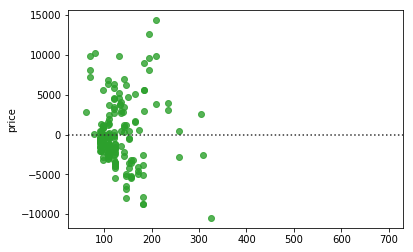

In [155]:
sns.residplot(cars_final[['engine-size']], cars['price'])
plt.show()

In [156]:
mse_engine_size = mean_squared_error(cars_final[['engine-size']], cars['price'])
score_engine_size = model.score(cars_final[['engine-size']], cars['price'])
rlu_engine_size = (score_engine_size/mse_engine_size)
rlu_engine_size

3.2357293591204564e-09